## data **connection**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snp

#Read files
out=pd.read_csv('/content/drive/MyDrive/datascience/Data/Data Analysis Project - Practice/Outlets.csv')
prod=pd.read_csv('/content/drive/MyDrive/datascience/Data/Data Analysis Project - Practice/Products.csv')
reps=pd.read_excel('/content/drive/MyDrive/datascience/Data/Data Analysis Project - Practice/Reps List.xlsx')
sales=pd.read_excel('/content/drive/MyDrive/datascience/Data/Data Analysis Project - Practice/Sales.xlsx')
tgt=pd.read_excel('/content/drive/MyDrive/datascience/Data/Data Analysis Project - Practice/Targets April 2021.xlsx')
visits=pd.read_excel('/content/drive/MyDrive/datascience/Data/Data Analysis Project - Practice/Visits.xlsx')
ware=pd.read_excel('/content/drive/MyDrive/datascience/Data/Data Analysis Project - Practice/Warehouses.xlsx')


# Data cleaning & **Transformation**

In [19]:
visits
visits.info() #sale amount has lot of null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219648 entries, 0 to 219647
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DB Name              219648 non-null  object        
 1   Sales Rep ID         219648 non-null  int64         
 2   Sales Rep Name       219648 non-null  object        
 3   Date                 219648 non-null  datetime64[ns]
 4   Classification       219648 non-null  object        
 5   Store Code           219648 non-null  int64         
 6   Visit Starting Time  219648 non-null  object        
 7   Visit Ending Time    219648 non-null  object        
 8   Sale Amount          875 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 15.1+ MB


In [4]:
#data cleaning
tgt=tgt.drop(['Unnamed: 7','Unnamed: 8'],axis=1)

KeyError: "['Unnamed: 7', 'Unnamed: 8'] not found in axis"

In [5]:
tgt

,asdfasfd,asdfasfd.1
0,asdfasfd,asdfasfd
1,asdfasfd,asdfasfd


In [6]:
#sales of april 2021
sales['year']=sales['Date'].dt.year
sales['month']=sales['Date'].dt.month
sales_apr_2021=sales[(sales['year']==2021) & (sales['month']==4)]
sales_apr_2021
#sales per rep
sales_per_rep=pd.pivot_table(
    data=sales_apr_2021,
    index='Username',
    values='Total Price',
    aggfunc='sum'
).reset_index()
sales_per_rep

,Username,Total Price
0,Rep0003,1603653.73
1,Rep0004,602719.38
2,Rep0005,425102.71
3,Rep0006,884008.01
4,Rep0007,274999.91
5,Rep0008,417487.25
6,Rep0009,750954.80
7,Rep0010,817140.26
8,Rep0011,344263.65
9,Rep0012,659260.57


In [8]:
#sales of april 2021
sales['year']=sales['Date'].dt.year
sales['month']=sales['Date'].dt.month
sales_apr_2021=sales[(sales['year']==2021) & (sales['month']==4)]
sales_apr_2021

,Date,Sub_Db_Name,Username,Name_Of_The_User,Outlet_Id,PRODUCT_CODE,Product Name,Quantity,Price_Per_Piece,Total Price,year,month
71238,2021-04-01,DB 4,Rep0010,Amgad,3754,98761,Soap 165gm - Red,240,10.83,2599.20,2021,4
71239,2021-04-01,DB 3,Rep0005,Amgad Mohsen,3522,27977,Soap 165gm - yellow,1,10.83,10.83,2021,4
71240,2021-04-01,DB 3,Rep0005,Amgad Mohsen,3522,77397,Soap 60gm - Normal,6,3.50,21.00,2021,4
71241,2021-04-01,DB 3,Rep0005,Amgad Mohsen,3522,91553,Soap 60gm - blue,6,3.50,21.00,2021,4
71242,2021-04-01,DB 3,Rep0005,Amgad Mohsen,3971,27977,Soap 165gm - yellow,1,10.83,10.83,2021,4
...,...,...,...,...,...,...,...,...,...,...,...,...
81161,2021-04-17,DB 6,Rep0008,Yasser,4499,29213,Soap 165gm - blue 4 pcs 4 EGP Discount,1,41.33,41.33,2021,4
81162,2021-04-17,DB 6,Rep0008,Yasser,4499,52554,Soap 125gm - Normal,1,8.33,8.33,2021,4
81163,2021-04-17,DB 6,Rep0008,Yasser,4499,77397,Soap 60gm - Normal,12,3.50,42.00,2021,4
81164,2021-04-17,DB 6,Rep0008,Yasser,4499,91553,Soap 60gm - blue,6,3.50,21.00,2021,4


# **Vizualization**

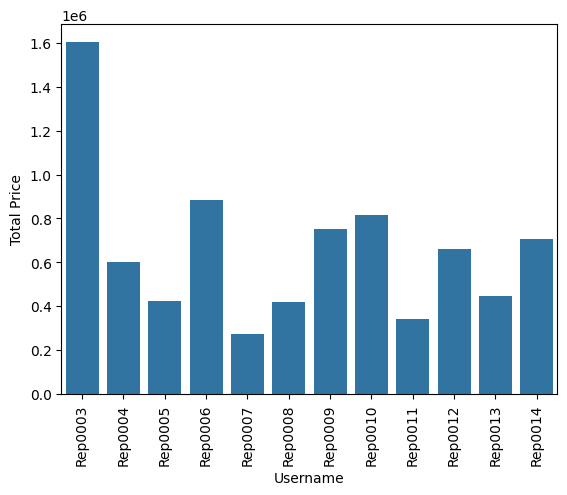

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=sales_per_rep,x='Username',y='Total Price')
plt.xticks(rotation=90)
plt.show()

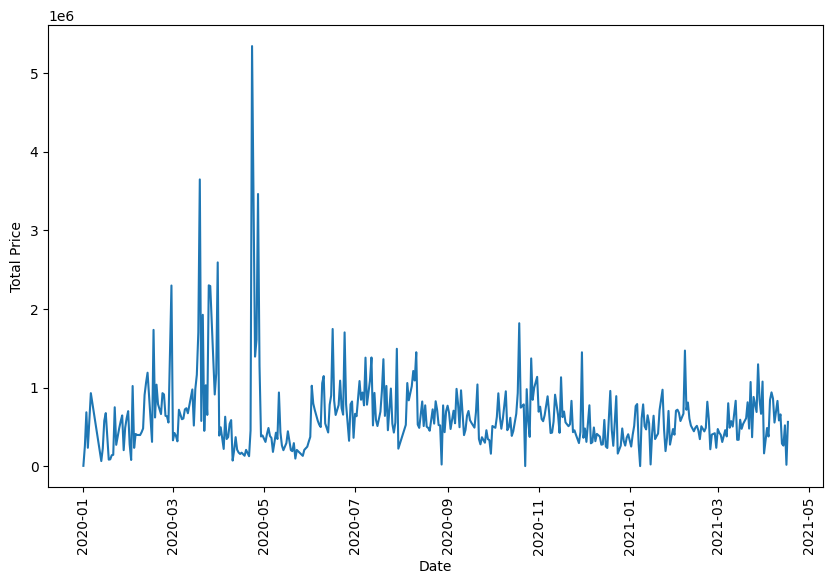

In [15]:
plt.figure(figsize=(10,6))
sales1=pd.pivot_table(
    data=sales,
    index='Date',
    values='Total Price',
    aggfunc='sum'
).reset_index()

sns.lineplot(data=sales1, x='Date', y='Total Price')
plt.xticks(rotation=90)
plt.show()

In [16]:
salesviz=pd.pivot_table(
    data=sales_apr_2021,
    index='Date',
    values='Total Price',
    aggfunc='sum'
).reset_index()
salesviz

,Date,Total Price
0,2021-04-01,162344.17
1,2021-04-03,484524.19
2,2021-04-04,377097.86
3,2021-04-05,840802.01
4,2021-04-06,938587.15
5,2021-04-07,860166.69
6,2021-04-08,554467.76
7,2021-04-10,830029.59
8,2021-04-11,581304.10
9,2021-04-12,658273.54


In [24]:
warehouses_per_region = ware['Region'].value_counts().reset_index()
warehouses_per_region.columns = ['Region', 'Warehouse Count']
print("\nNumber of warehouses per region:\n", warehouses_per_region)

# Average warehouse code per region
avg_code_per_region = ware.groupby('Region')['Code'].mean().reset_index()
avg_code_per_region.columns = ['Region', 'Average Code']
print("\nAverage warehouse code per region:\n", avg_code_per_region)


Number of warehouses per region:
        Region  Warehouse Count
0       Delta                4
1       Upper                2
2  Cairo/Giza                1

Average warehouse code per region:
        Region  Average Code
0  Cairo/Giza      13887.00
1       Delta      50710.25
2       Upper      25783.50


<ipython-input-30-36c4c898b070>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Warehouse Count', data=warehouses_per_region, palette="viridis")


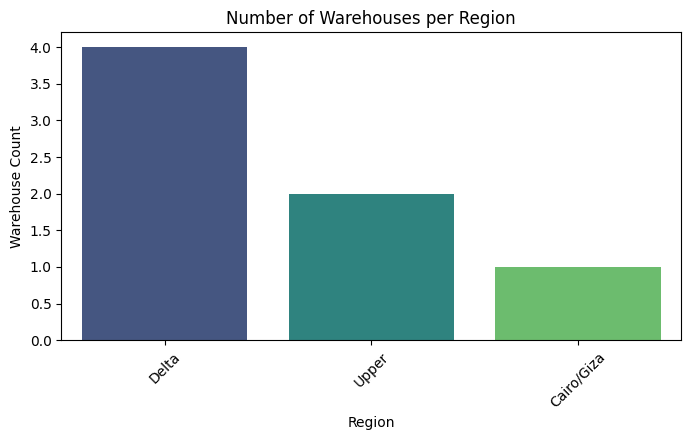

In [30]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Region', y='Warehouse Count', data=warehouses_per_region, palette="viridis")
plt.title("Number of Warehouses per Region")
plt.xlabel("Region")
plt.ylabel("Warehouse Count")
plt.xticks(rotation=45)
plt.show()

